In [1]:
import constants as const
import firebase_admin
from firebase_admin import credentials, firestore
import pandas as pd
import os

In [2]:
os.environ["HTTP_PROXY"] = ""
os.environ["HTTPS_PROXY"] = ""

In [3]:
# connect to the firestore database
cred = credentials.Certificate(const.FIREBASE_CRED_PATH)
firebase_admin.initialize_app(cred)
db = firestore.client()

In [4]:
def collection_to_dataframe(coll_name):
    print("Starting collection_to_dataframe")
    # get the collection reference
    coll_ref = db.collection(coll_name)
    # Initialize an empty list to hold the documents' data
    data = []
    
    # Stream the documents from the collection
    docs = coll_ref.stream()
    print("Starting stream")
    # Iterate over the documents and convert each to a dictionary
    for doc in docs:
        doc_data = doc.to_dict()
        # doc_data['document_id'] = doc.id  # Optionally include the document ID
        data.append(doc_data)
    print("Finished stream")
    # Convert the list of dictionaries to a pandas DataFrame
    df = pd.DataFrame(data)
    
    return df

In [5]:
participants_df = collection_to_dataframe(const.FIREBASE_PARTICIPANTS_COLLECTION)
experiment_feedback_df = collection_to_dataframe(const.FIREBASE_EXPERIMENT_FEEDBACK_COLLECTION)
post_questionnaire_df = collection_to_dataframe(const.FIREBASE_POST_QUESTIONNAIRE_FEEDBACK_COLLECTION)

Starting collection_to_dataframe
Starting stream
Finished stream
Starting collection_to_dataframe
Starting stream
Finished stream
Starting collection_to_dataframe
Starting stream
Finished stream


In [6]:
participants_df

,entity_type,company,age,gender,email,participant_id,participant_name
0,Incubator,test2,18,Female,test2@test2.test2,0332dd13-4d73-4dd9-845f-f16df8edfb4e,test2
1,Incubator,test,18,Female,test@test.test,0e760756-d4b9-43e2-87d5-6a4450c9f385,test
2,Research Facility,RCK,28,Female,polinag@rckmc.com,16bc6bfa-7c3c-4851-b5eb-cae5f3720dcb,polina golshmid
3,Research Facility,Mama bio,35,Male,Nitzan@mamabio.com,20f9a069-9e2c-4327-907f-514517a78d44,Nitzan levinson
4,Incubator,test,18,Female,test@test.test,36cbf19d-d09c-4282-bada-3fe20bcf64c6,test
5,Incubator,test,18,Female,test@test.test,413e30e0-9146-46aa-9f8f-6c6178a5c588,test
6,Commercial Grower,plantis agro,36,Male,barak.obama@plantis.co.il,44cc47a7-c6d6-4c15-9065-e6048594a2fa,barak berenstein
7,Research Facility,RCK,28,Female,polinag@rckmc.com,4765725e-ae3c-44c5-be1a-e2258460b556,polina golshmid
8,Research Facility,RCK,28,Female,polinag@rck.mc,4dc941eb-9ff2-4703-a27d-773326a85fc5,polina golshmid
9,Commercial Grower,Eee,44,Female,E@g.com,509f8cee-ee10-4f78-9293-585e27a8c04f,S e


In [7]:
experiment_feedback_df

,image_path,clear_percentage,maturity_level,image_number,amber_percentage,cloudy_percentage,participant_id,timestamp,time_taken_seconds
0,https://storage.googleapis.com/trichome_classi...,75,Early Development,IMG_0003,5,20,c0137a17-3eea-4a50-9c1d-e65fe498b246,2024-02-19 17:57:15,10.51
1,https://storage.googleapis.com/trichome_classi...,44,Mid Flower,IMG_0041,3,53,c0137a17-3eea-4a50-9c1d-e65fe498b246,2024-02-19 17:59:55,3.36
2,https://storage.googleapis.com/trichome_classi...,30,Nearly Harvest,IMG_1168,2,68,4765725e-ae3c-44c5-be1a-e2258460b556,2024-03-31 11:15:25,113.27
3,https://storage.googleapis.com/trichome_classi...,51,Mid Flower,IMG_1161,6,43,c0137a17-3eea-4a50-9c1d-e65fe498b246,2024-02-19 17:56:09,5.76
4,https://storage.googleapis.com/trichome_classi...,36,Mid Flower,IMG_1827,12,52,c0137a17-3eea-4a50-9c1d-e65fe498b246,2024-02-19 17:45:32,4.34
...,...,...,...,...,...,...,...,...,...
216,https://storage.googleapis.com/trichome_classi...,57,Mid Flower,IMG_0044,12,31,c0137a17-3eea-4a50-9c1d-e65fe498b246,2024-02-19 17:58:17,12.46
217,https://storage.googleapis.com/trichome_classi...,59,Mid Flower,IMG_1082,0,41,c0137a17-3eea-4a50-9c1d-e65fe498b246,2024-02-19 17:49:36,11.77
218,https://storage.googleapis.com/trichome_classi...,56,Early Development,IMG_1112,6,38,c0137a17-3eea-4a50-9c1d-e65fe498b246,2024-02-19 17:38:00,28.26
219,https://storage.googleapis.com/trichome_classi...,48,Nearly Harvest,IMG_2129,9,43,c0137a17-3eea-4a50-9c1d-e65fe498b246,2024-02-19 17:48:16,8.61


In [8]:
post_questionnaire_df

,experience_level,educational_background,additional_comments,difficulty,suggestions,vision_quality,participant_id,confidence
0,None,No Education,test,Moderate,test,No,0e760756-d4b9-43e2-87d5-6a4450c9f385,Medium
1,Beginner,Bachelor’s Degree,,Hard,,No,4765725e-ae3c-44c5-be1a-e2258460b556,Low
2,Intermediate,Bachelor’s Degree,,Hard,preticting thc levels,No,44cc47a7-c6d6-4c15-9065-e6048594a2fa,High


### Clean Test Records
In this section I will clean the test records created by testing the app

In [9]:
import pandas as pd

def clean_test_records(participants_df, experiment_feedback_df, post_questionnaire_df):
    # Filter out test records from participants_df
    non_test_mask = ~participants_df['participant_name'].str.contains('test', case=False, na=False)
    cleaned_participants_df = participants_df[non_test_mask]
    
    # Get the list of valid participant IDs from the cleaned participants_df
    valid_participant_ids = cleaned_participants_df['participant_id'].unique()
    
    # Filter out records in experiment_feedback_df linked to test participants
    cleaned_experiment_feedback_df = experiment_feedback_df[experiment_feedback_df['participant_id'].isin(valid_participant_ids)]
    
    # Filter out records in post_questionnaire_df linked to test participants
    cleaned_post_questionnaire_df = post_questionnaire_df[post_questionnaire_df['participant_id'].isin(valid_participant_ids)]
    
    return cleaned_participants_df, cleaned_experiment_feedback_df, cleaned_post_questionnaire_df

In [10]:
# Apply the Cleaning Function

# Clean the test records
cleaned_participants_df, cleaned_experiment_feedback_df, cleaned_post_questionnaire_df = clean_test_records(
    participants_df, experiment_feedback_df, post_questionnaire_df
)

In [11]:
cleaned_participants_df

,entity_type,company,age,gender,email,participant_id,participant_name
2,Research Facility,RCK,28,Female,polinag@rckmc.com,16bc6bfa-7c3c-4851-b5eb-cae5f3720dcb,polina golshmid
3,Research Facility,Mama bio,35,Male,Nitzan@mamabio.com,20f9a069-9e2c-4327-907f-514517a78d44,Nitzan levinson
6,Commercial Grower,plantis agro,36,Male,barak.obama@plantis.co.il,44cc47a7-c6d6-4c15-9065-e6048594a2fa,barak berenstein
7,Research Facility,RCK,28,Female,polinag@rckmc.com,4765725e-ae3c-44c5-be1a-e2258460b556,polina golshmid
8,Research Facility,RCK,28,Female,polinag@rck.mc,4dc941eb-9ff2-4703-a27d-773326a85fc5,polina golshmid
9,Commercial Grower,Eee,44,Female,E@g.com,509f8cee-ee10-4f78-9293-585e27a8c04f,S e
10,Commercial Grower,Plantis agro,66,Female,kamma18@hotmail.com,7fab6039-dee5-4242-888f-6414df14c740,Adriana Kamma
12,Commercial Grower,Evergreen Solomon Pharma,60,Male,asher@evg-pharma.com,a7e05ce6-d9b3-4a99-9b0d-8a27322143b6,Asher Shlomo
13,Incubator,W,18,Female,W@w.com,b2a2b048-06cc-4991-b68b-ae6e1df811ae,W
14,Research Facility,Cannabis encyclopedia,35,Male,Yoavgiladi@gmail.com,c0137a17-3eea-4a50-9c1d-e65fe498b246,Yoav


In [12]:
cleaned_experiment_feedback_df

,image_path,clear_percentage,maturity_level,image_number,amber_percentage,cloudy_percentage,participant_id,timestamp,time_taken_seconds
0,https://storage.googleapis.com/trichome_classi...,75,Early Development,IMG_0003,5,20,c0137a17-3eea-4a50-9c1d-e65fe498b246,2024-02-19 17:57:15,10.51
1,https://storage.googleapis.com/trichome_classi...,44,Mid Flower,IMG_0041,3,53,c0137a17-3eea-4a50-9c1d-e65fe498b246,2024-02-19 17:59:55,3.36
2,https://storage.googleapis.com/trichome_classi...,30,Nearly Harvest,IMG_1168,2,68,4765725e-ae3c-44c5-be1a-e2258460b556,2024-03-31 11:15:25,113.27
3,https://storage.googleapis.com/trichome_classi...,51,Mid Flower,IMG_1161,6,43,c0137a17-3eea-4a50-9c1d-e65fe498b246,2024-02-19 17:56:09,5.76
4,https://storage.googleapis.com/trichome_classi...,36,Mid Flower,IMG_1827,12,52,c0137a17-3eea-4a50-9c1d-e65fe498b246,2024-02-19 17:45:32,4.34
...,...,...,...,...,...,...,...,...,...
216,https://storage.googleapis.com/trichome_classi...,57,Mid Flower,IMG_0044,12,31,c0137a17-3eea-4a50-9c1d-e65fe498b246,2024-02-19 17:58:17,12.46
217,https://storage.googleapis.com/trichome_classi...,59,Mid Flower,IMG_1082,0,41,c0137a17-3eea-4a50-9c1d-e65fe498b246,2024-02-19 17:49:36,11.77
218,https://storage.googleapis.com/trichome_classi...,56,Early Development,IMG_1112,6,38,c0137a17-3eea-4a50-9c1d-e65fe498b246,2024-02-19 17:38:00,28.26
219,https://storage.googleapis.com/trichome_classi...,48,Nearly Harvest,IMG_2129,9,43,c0137a17-3eea-4a50-9c1d-e65fe498b246,2024-02-19 17:48:16,8.61


In [13]:
cleaned_post_questionnaire_df

,experience_level,educational_background,additional_comments,difficulty,suggestions,vision_quality,participant_id,confidence
1,Beginner,Bachelor’s Degree,,Hard,,No,4765725e-ae3c-44c5-be1a-e2258460b556,Low
2,Intermediate,Bachelor’s Degree,,Hard,preticting thc levels,No,44cc47a7-c6d6-4c15-9065-e6048594a2fa,High


#### Get Unique images Ids

In [14]:
unique_image_numbers = cleaned_experiment_feedback_df['image_number'].unique().tolist()
len(unique_image_numbers)

170

#### Asses how many annotated data from the users annotations
In this section, we'll review the count of images from the user-annotated dataset that are already annotated for training and validation purposes.

In [19]:
# get annotated data
import csv

# Define the path to the CSV file
annotated_data_csv_path = r'C:\Users\elorberb\PycharmProjects\BGU projects\thesis\metadata\annotations_tracking.csv'

# Initialize an empty list to store the image numbers with prefix
annotated_images_list = []

# Open the CSV file and read the contents
with open(annotated_data_csv_path, mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)  # Skip the header if there is one
    for row in csv_reader:
        image_number_with_prefix = f'IMG_{row[0]}'
        annotated_images_list.append(image_number_with_prefix)

# Now images_with_prefix contains all the image numbers with the prefix added
print(annotated_images_list)

['IMG_2198', 'IMG_2153', 'IMG_2305', 'IMG_2145', 'IMG_2129', 'IMG_1875', 'IMG_1787', 'IMG_1857', 'IMG_1753', 'IMG_1777', 'IMG_1818', 'IMG_0014', 'IMG_0003', 'IMG_0002', 'IMG_0001', 'IMG_1093', 'IMG_1086', 'IMG_1085', 'IMG_1079', 'IMG_1082', 'IMG_1084', 'IMG_0016', 'IMG_0017', 'IMG_0540', 'IMG_0542', 'IMG_0543', 'IMG_0545', 'IMG_0546', 'IMG_0547', 'IMG_2242', 'IMG_2285']


In [20]:
# We need to strip the prefix from annotated_images_list to compare properly
stripped_image_numbers = [number.replace('IMG_', '') for number in annotated_images_list]
stripped_users_image_numbers = [number.replace('IMG_', '') for number in unique_image_numbers]
# Find the difference between the two sets
images_not_annotated = set(stripped_users_image_numbers) - set(stripped_image_numbers)

# Convert the image numbers back to the prefixed format
missing_annotated_images_list = [f'IMG_{num}' for num in images_not_annotated]

print(f"Amount of images that need to be annotate: {len(missing_annotated_images_list)}")
print(missing_annotated_images_list)

Amount of images that need to be annotate: 144
['IMG_0030', 'IMG_0586', 'IMG_2250', 'IMG_1119', 'IMG_0591', 'IMG_2257', 'IMG_1133', 'IMG_0638', 'IMG_1768', 'IMG_1132', 'IMG_1130', 'IMG_0041', 'IMG_1840', 'IMG_1835', 'IMG_2149', 'IMG_0652', 'IMG_2304', 'IMG_0580', 'IMG_0633', 'IMG_0033', 'IMG_0062', 'IMG_1867', 'IMG_1161', 'IMG_2210', 'IMG_2234', 'IMG_1117', 'IMG_1834', 'IMG_0573', 'IMG_1778', 'IMG_0649', 'IMG_0022', 'IMG_1838', 'IMG_1823', 'IMG_1868', 'IMG_1112', 'IMG_1094', 'IMG_1799', 'IMG_2224', 'IMG_2148', 'IMG_1128', 'IMG_1137', 'IMG_2140', 'IMG_0583', 'IMG_1798', 'IMG_0575', 'IMG_9986', 'IMG_0071', 'IMG_2171', 'IMG_9985', 'IMG_1849', 'IMG_2228', 'IMG_0642', 'IMG_1191', 'IMG_1193', 'IMG_1188', 'IMG_0577', 'IMG_1145', 'IMG_2161', 'IMG_1906', 'IMG_2135', 'IMG_1187', 'IMG_1118', 'IMG_2276', 'IMG_1182', 'IMG_0581', 'IMG_2271', 'IMG_2235', 'IMG_1144', 'IMG_0048', 'IMG_2167', 'IMG_2163', 'IMG_1111', 'IMG_0576', 'IMG_9979', 'IMG_2166', 'IMG_1160', 'IMG_2146', 'IMG_0023', 'IMG_1204', 'IMG

In [21]:
# save the images that needs to be annotated to a pickle
import pickle

with open('missed_annotation_images.pkl', 'wb') as f:
    pickle.dump(missing_annotated_images_list, f)

In [15]:
# how many annotations we have for each image
cleaned_experiment_feedback_df['image_number'].value_counts()

image_number
IMG_1130    3
IMG_1128    3
IMG_0030    3
IMG_2158    2
IMG_2276    2
           ..
IMG_1145    1
IMG_0581    1
IMG_1835    1
IMG_2242    1
IMG_0017    1
Name: count, Length: 170, dtype: int64

### Check how many annotations we have for each week

In [21]:
import config
good_quality_images_df = pd.read_csv("../../metadata/good_quality_images.csv")

# Filter the DataFrame to only include rows where the image_number is in unique_image_numbers
filtered_df = good_quality_images_df[good_quality_images_df['image_number'].isin(unique_image_numbers)]

 #count the number of images per week from the filtered DataFrame
images_per_week_filtered = filtered_df.groupby('week_number').size()

images_per_week_filtered

week_number
5    26
6    33
7    41
8    27
9    46
dtype: int64

In [25]:
df = cleaned_experiment_feedback_df

### Analysis the results from the users experiment
#### Descriptive Statistics for Trichome Percentages

#### Annotator Analysis

In [69]:
# Merge the DataFrames on 'participant_id'
merged_df = pd.merge(cleaned_experiment_feedback_df, cleaned_participants_df, on='participant_id', how='left')

# Group data by participant and calculate summary statistics
annotator_stats_trichome_ratios = merged_df.groupby('participant_name')[['clear_percentage', 'amber_percentage', 'cloudy_percentage']].agg(['mean', 'std', 'count'])

# Print the statistics for each annotator
annotator_stats_trichome_ratios

clear_percentage                  amber_percentage  \
                             mean        std count             mean   
participant_name                                                      
W                       51.555556  34.925317     9         5.000000   
Yoav                    47.228188  17.851535   149        11.765101   
barak berenstein        41.300000  29.708153    40        10.050000   
polina golshmid         35.105263  21.921311    19         2.894737   

                                  cloudy_percentage                   
                        std count              mean        std count  
participant_name                                                      
W                  0.000000     9         43.444444  34.925317     9  
Yoav              13.302809   149         41.006711  13.003376   149  
barak berenstein  16.484569    40         48.650000  22.694798    40  
polina golshmid    7.085939    19         62.000000  19.020457    19

In [70]:
# Group data by participant and calculate summary statistics
annotator_stats_time_taken = merged_df.groupby('participant_name')[['time_taken_seconds']].agg(['mean', 'std', 'count'])

# Print the statistics for each annotator
annotator_stats_time_taken

time_taken_seconds                 
                               mean        std count
participant_name                                    
W                         18.314444   5.234883     9
Yoav                       9.519866   5.801848   149
barak berenstein          31.020750  12.282185    40
polina golshmid           70.982105  67.360111    19

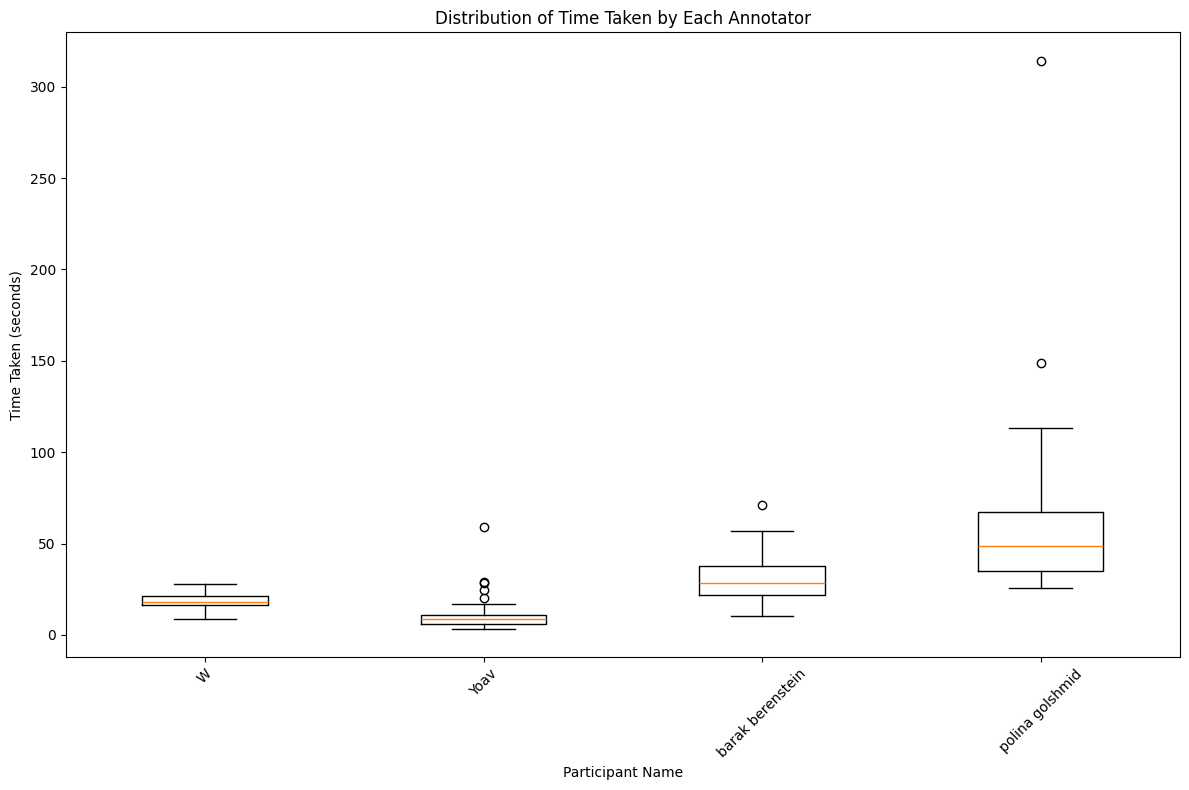

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming merged_df is already prepared and contains 'participant_name' and 'time_taken_seconds'

# Group data by participant and collect all time data for each
time_data_by_annotator = merged_df.groupby('participant_name')['time_taken_seconds'].apply(list)

# Prepare the data for plotting
participants = time_data_by_annotator.index.tolist()
time_values = [time_data_by_annotator[participant] for participant in participants]

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Creating the box plot
plt.boxplot(time_values, labels=participants)

# Adding labels and title
plt.ylabel('Time Taken (seconds)')
plt.xlabel('Participant Name')
plt.title('Distribution of Time Taken by Each Annotator')
plt.xticks(rotation=45)  # Rotate names for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


#### statistics of trichome ratios per week

In [51]:
merged_df = pd.merge(filtered_df, cleaned_experiment_feedback_df, on='image_number')

# Calculate descriptive statistics for trichome ratios per week
trichome_ratios_stats = merged_df.groupby('week_number')[['clear_percentage', 'amber_percentage', 'cloudy_percentage']].describe()
trichome_ratios_stats

clear_percentage                                                  \
                       count       mean        std   min    25%   50%    75%   
week_number                                                                    
5                       35.0  56.257143  17.713974  28.0  42.00  54.0  71.50   
6                       40.0  56.825000  17.548303  15.0  48.25  59.0  66.00   
7                       56.0  47.071429  20.781860   0.0  34.75  50.5  59.25   
8                       32.0  42.125000  18.529401   6.0  36.00  36.0  55.25   
9                       58.0  30.482759  20.543699   0.0  11.00  31.5  47.75   

                  amber_percentage             ...               \
              max            count       mean  ...    75%   max   
week_number                                    ...                
5            90.0             35.0   2.114286  ...   4.00  12.0   
6            89.0             40.0   4.675000  ...   7.00  22.0   
7            85.0             56.0   7.500000  ...  10.00  30.0   
8            91.0             32.0   8.312500  ...  12.00  39.0   
9            79.0             58.0  22.896552  ...  26.75  80.0   

            cloudy_percentage                                                  \
                        count       mean        std   min    25%   50%    75%   
week_number                                                                     
5                        35.0  41.628571  17.335930  10.0  27.00  44.0  55.50   
6                        40.0  38.500000  16.943345   9.0  28.25  40.0  43.00   
7                        56.0  45.428571  18.621451  15.0  31.75  43.0  55.50   
8                        32.0  49.562500  17.632334   4.0  38.00  51.5  56.25   
9                        58.0  46.620690  17.479640  16.0  33.25  46.0  54.00   

                   
              max  
week_number        
5            72.0  
6            80.0  
7            85.0  
8            90.0  
9            86.0  

[5 rows x 24 columns]

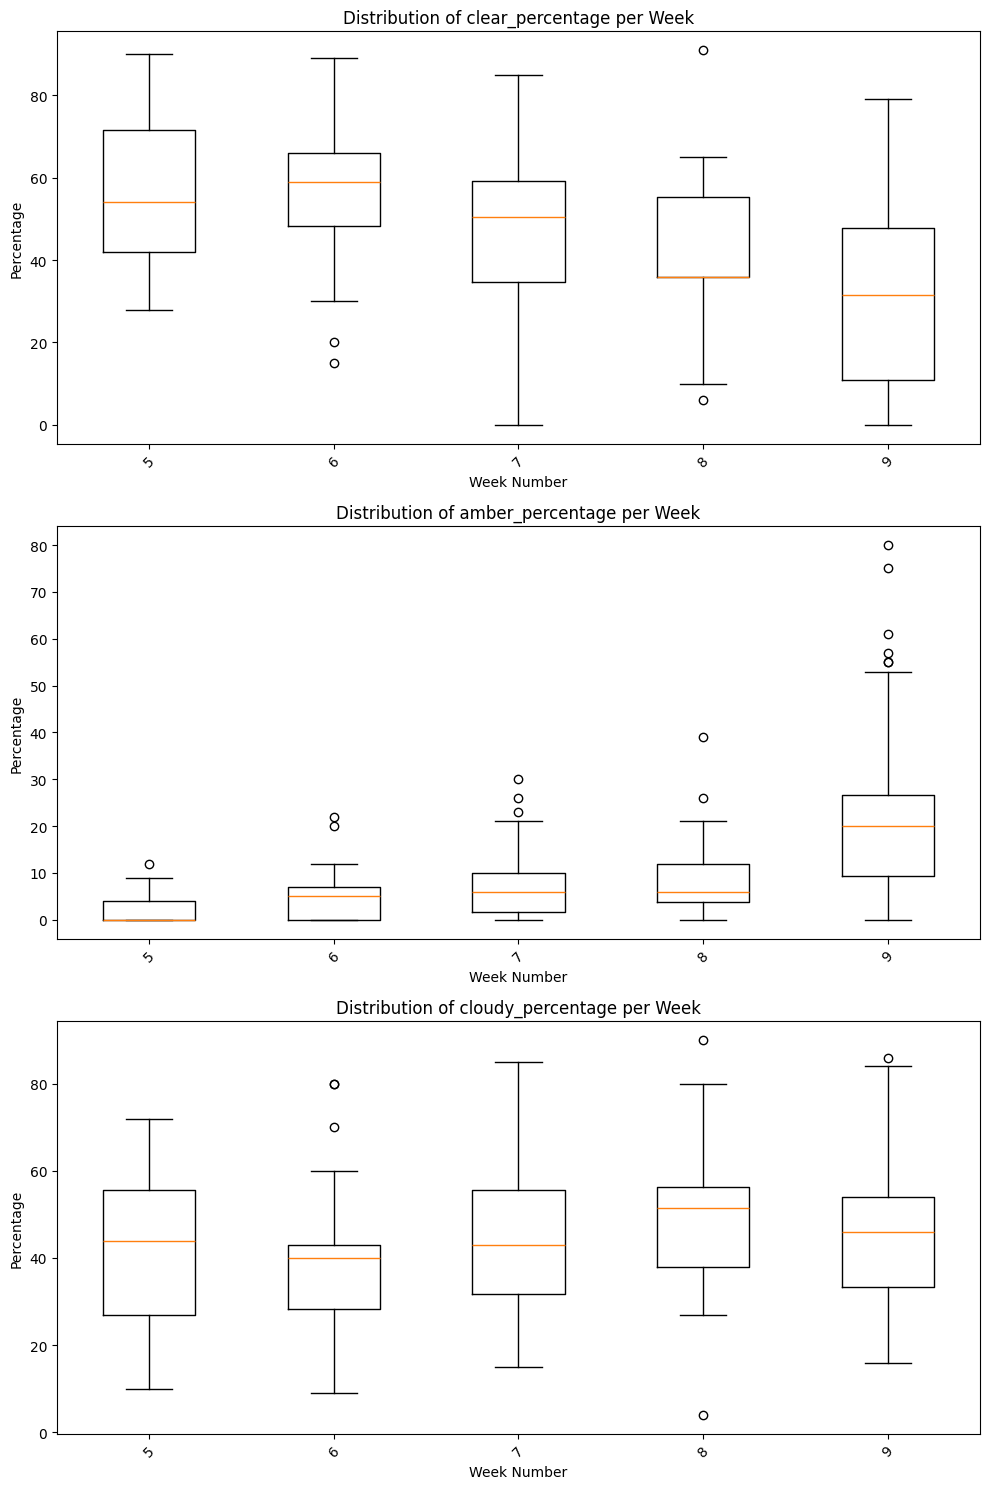

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming merged_df is already prepared and has the necessary columns

# Setting up the figure and axes
fig, axes = plt.subplots(3, 1, figsize=(10, 15))  # Creates a figure and three subplots

# Titles for each subplot
titles = ['Clear Percentage', 'Amber Percentage', 'Cloudy Percentage']

# Iterate over the axes and the trichome ratios to plot each one
for ax, trichome_ratio in zip(axes, ['clear_percentage', 'amber_percentage', 'cloudy_percentage']):
    # Group data by 'week_number' and get lists of values for each week
    groups = merged_df.groupby('week_number')[trichome_ratio].apply(list)
    
    # Prepare data for boxplot: sorting weeks and getting corresponding values
    weeks = groups.index.tolist()
    values = [groups[week] for week in weeks]
    
    # Create the box plot
    ax.boxplot(values, labels=weeks)
    ax.set_title(f'Distribution of {trichome_ratio} per Week')
    ax.set_xlabel('Week Number')
    ax.set_ylabel('Percentage')
    ax.set_xticklabels(weeks, rotation=45)  # Rotate week labels for better readability

# Adjust layout to prevent overlap
fig.tight_layout()

# Show the plot
plt.show()


In [52]:
# Calculate descriptive statistics for time taken to complete the classification per week
time_taken_stats = merged_df.groupby('week_number')[['time_taken_seconds']].describe()
time_taken_stats

time_taken_seconds                                              \
                         count       mean        std   min     25%     50%   
week_number                                                                  
5                         35.0  14.862000  12.849169  3.36  7.6500  10.270   
6                         40.0  17.413250  18.302231  3.93  7.9975  10.135   
7                         56.0  24.671250  44.318800  4.09  6.5325  11.725   
8                         32.0  13.130625   8.922711  4.34  6.3675   9.435   
9                         58.0  20.616207  23.290253  4.18  8.7425  10.895   

                              
                 75%     max  
week_number                   
5            18.2500   69.07  
6            20.7425  106.98  
7            24.3425  314.22  
8            18.3725   37.46  
9            30.4775  148.67

<Figure size 1200x800 with 0 Axes>

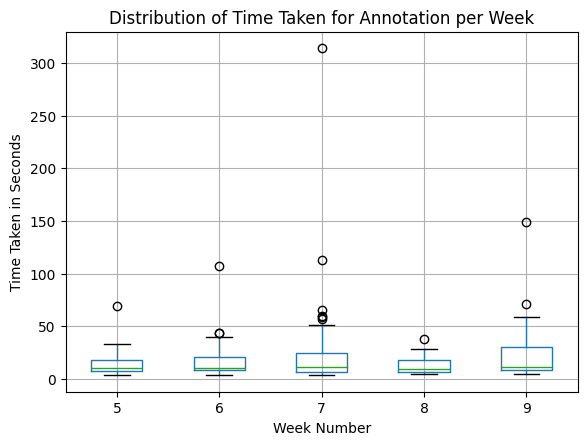

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'merged_df' has been defined and includes both 'week_number' and 'time_taken_seconds'
# If you haven't already calculated the descriptive statistics and just want to plot, skip directly to plotting:

# Create a boxplot of time taken for each week
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
merged_df.boxplot(column='time_taken_seconds', by='week_number')

# Adding titles and labels
plt.title('Distribution of Time Taken for Annotation per Week')
plt.suptitle('')  # Suppress the automatic "by" title that matplotlib generates
plt.xlabel('Week Number')
plt.ylabel('Time Taken in Seconds')

# Show the plot
plt.show()


#### Maturity Level Distribution

In [53]:
# Frequency of each maturity level
maturity_level_counts = df['maturity_level'].value_counts()
maturity_level_counts

maturity_level
Mid Flower           106
Nearly Harvest        47
Early Development     44
At Harvest            14
Over Maturity          6
Name: count, dtype: int64

In [61]:
maturity_distribution_per_week = merged_df.groupby(['week_number', 'maturity_level']).size().unstack(fill_value=0)
maturity_distribution_per_week

maturity_level,At Harvest,Early Development,Mid Flower,Nearly Harvest,Over Maturity
week_number,,,,,
5,0,18,15,1,1
6,0,16,19,5,0
7,0,9,35,11,1
8,2,1,19,10,0
9,12,0,21,21,4


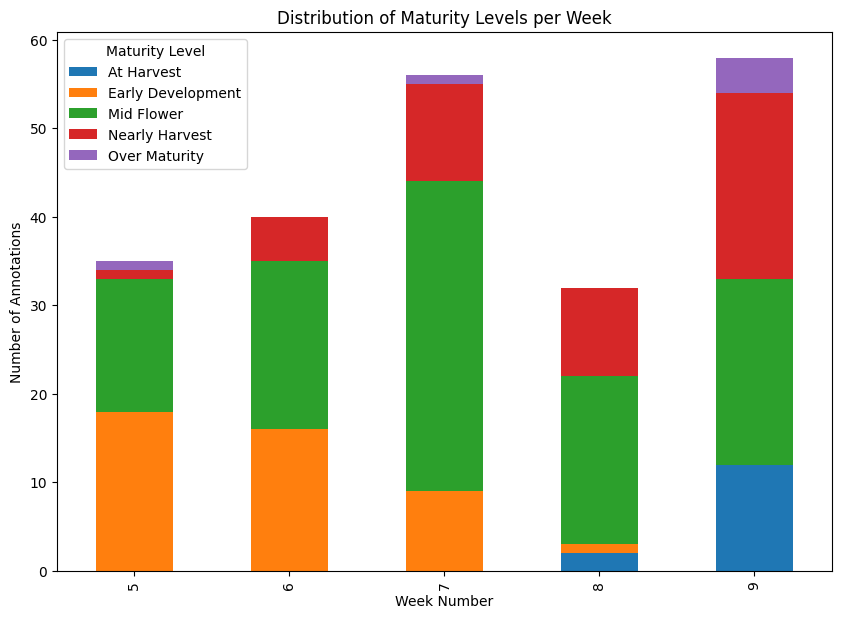

In [63]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have the maturity_distribution_per_week data already prepared
# If not, here's how you could obtain it:
# maturity_distribution_per_week = cleaned_experiment_feedback_df.groupby(['week_number', 'maturity_level']).size().unstack(fill_value=0)

# Generate a stacked bar chart
maturity_distribution_per_week.plot(kind='bar', stacked=True, figsize=(10, 7))

# Adding titles and labels
plt.title('Distribution of Maturity Levels per Week')
plt.xlabel('Week Number')
plt.ylabel('Number of Annotations')
plt.legend(title='Maturity Level')

# Show the plot
plt.show()
